___

In [1]:
# Import libraries to be used

# Warning messages display
# import warnings
# warnings.filterwarnings(action='once') # https://docs.python.org/3/library/warnings.html#the-warnings-filter

# Directories/Files management
import os.path
## from zipfile import ZipFile # De momento no ha hecho falta 

# Timing
import time

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
pd.set_option('display.max_rows', 100) # If too high, it greatly slows down the output display and freezes the kernel


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning
## from sklearn.[...] import ...

In [2]:
%load_ext memory_profiler

In [3]:
t0 = time.perf_counter() 

In [4]:
# Detect Operating System running and manage paths accordingly

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


# Load the dataset

In [5]:
cols = [
    'MONTH',
#     'DAY_OF_MONTH',
    'DAY_OF_WEEK',
    'OP_UNIQUE_CARRIER',
#     'TAIL_NUM',
#     'ORIGIN',
#     'ORIGIN_CITY_NAME',
#     'ORIGIN_STATE_ABR',
    'ORIGIN_STATE_NM',
#     'WBAN_Origin_OTP',
#     'DEST',
#     'DEST_CITY_NAME',
#     'DEST_STATE_ABR',
    'DEST_STATE_NM',
#     'WBAN_Dest_OTP',
#     'CRS_DEP_TIME',
#     'DEP_TIME',
#     'DEP_DELAY',
#     'DEP_DEL15',
    'DEP_TIME_hour',
#     'TAXI_OUT',
#     'TAXI_IN',
    'TAXI_OUT_median',
    'TAXI_IN_median',
#     'CRS_ARR_TIME',
#     'ARR_TIME',
#     'ARR_DELAY',
    'ARR_DEL15', # → Target !!
    'ARR_TIME_hour',
#     'CANCELLED',
#     'CRS_ELAPSED_TIME',
#     'DISTANCE',
    'DISTANCE_GROUP',
#     'CARRIER_DELAY',
#     'WEATHER_DELAY',
#     'NAS_DELAY',
#     'SECURITY_DELAY',
#     'LATE_AIRCRAFT_DELAY',
    
#     'STATION_Origin',
#     'WMO_Origin',
#     'WBAN_Origin_LCD',
#     'LATITUDE_Origin',
#     'LONGITUDE_Origin',
    'HourlyAltimeterSetting_Origin',
    'HourlyDryBulbTemperature_Origin',
    'HourlyPrecipitation_Origin',
    'HourlyRelativeHumidity_Origin',
    'HourlySkyConditions_Origin',
    'HourlyVisibility_Origin',
#     'HourlyWindDirection_Origin',
    'HourlyWindGustSpeed_Origin',
    'HourlyWindSpeed_Origin',
#     'REM_Origin',
#     'STATION_Dest',
#     'WMO_Dest',
#     'WBAN_Dest_LCD',
#     'LATITUDE_Dest',
#     'LONGITUDE_Dest',
    'HourlyAltimeterSetting_Dest',
    'HourlyDryBulbTemperature_Dest',
    'HourlyPrecipitation_Dest',
    'HourlyRelativeHumidity_Dest',
    'HourlySkyConditions_Dest',
    'HourlyVisibility_Dest',
#     'HourlyWindDirection_Dest',
    'HourlyWindGustSpeed_Dest',
    'HourlyWindSpeed_Dest',
#     'REM_Dest'
]

In [6]:
cols_dtypes = {
    'MONTH' : 'category',
#     'DAY_OF_MONTH' : 'category',
    'DAY_OF_WEEK' : 'category',
    'OP_UNIQUE_CARRIER' : 'category',
#     'TAIL_NUM' : 'category',
#     'ORIGIN' : 'category',
#     'ORIGIN_CITY_NAME' : 'category',
#     'ORIGIN_STATE_ABR' : 'category',
    'ORIGIN_STATE_NM' : 'category',
#     'WBAN_Origin_OTP' : 'category',
#     'DEST' : 'category',
#     'DEST_CITY_NAME' : 'category',
#     'DEST_STATE_ABR' : 'category',
    'DEST_STATE_NM' : 'category',
#     'WBAN_Dest_OTP' : 'category',
#     'CRS_DEP_TIME' : 'category',
#     'DEP_TIME' : 'category',
#     'DEP_DELAY' : 'int32',
#     'DEP_DEL15' : 'int32',
    'DEP_TIME_hour' : 'category',
#     'TAXI_OUT' : 'int32',
#     'TAXI_IN' : 'int32',
    'TAXI_OUT_median' : 'int32',
    'TAXI_IN_median' : 'int32',
#     'CRS_ARR_TIME' : 'category',
#     'ARR_TIME' : 'category',
#     'ARR_DELAY' : 'int32',
    'ARR_DEL15' : 'int32', # → Target !!
    'ARR_TIME_hour' : 'category',
#     'CANCELLED' : 'category',
#     'CRS_ELAPSED_TIME' : 'int32',
#     'DISTANCE' : 'int32',
    'DISTANCE_GROUP' : 'category',
#     'CARRIER_DELAY' : 'int32',
#     'WEATHER_DELAY' : 'int32',
#     'NAS_DELAY' : 'int32',
#     'SECURITY_DELAY' : 'int32',
#     'LATE_AIRCRAFT_DELAY' : 'int32',

#     'STATION_Origin' : 'category',
#     'WMO_Origin' : 'category',
#     'WBAN_Origin_LCD' : 'category',
#     'LATITUDE_Origin' : 'float64',
#     'LONGITUDE_Origin' : 'float64',
    'HourlyAltimeterSetting_Origin' : 'float64',
    'HourlyDryBulbTemperature_Origin' : 'float64',
    'HourlyPrecipitation_Origin' : 'float64',
    'HourlyRelativeHumidity_Origin' : 'float64',
    'HourlySkyConditions_Origin' : 'category',
    'HourlyVisibility_Origin' : 'float64',
#     'HourlyWindDirection_Origin' : 'category',
    'HourlyWindGustSpeed_Origin' : 'float64',
    'HourlyWindSpeed_Origin' : 'float64',
#     'REM_Origin' : 'category',
#     'STATION_Dest' : 'category',
#     'WMO_Dest' : 'category',
#     'WBAN_Dest_LCD' : 'category',
#     'LATITUDE_Dest' : 'float64',
#     'LONGITUDE_Dest' : 'float64',
    'HourlyAltimeterSetting_Dest' : 'float64',
    'HourlyDryBulbTemperature_Dest' : 'float64',
    'HourlyPrecipitation_Dest' : 'float64',
    'HourlyRelativeHumidity_Dest' : 'float64',
    'HourlySkyConditions_Dest' : 'category',
    'HourlyVisibility_Dest' : 'float64',
#     'HourlyWindDirection_Dest' : 'category',
    'HourlyWindGustSpeed_Dest' : 'float64',
    'HourlyWindSpeed_Dest' : 'float64',
#     'REM_Dest' : 'category',
}

In [7]:
preprocessed_input_csv_path = os.path.join(root,
                                           "Output_Data",
                                           "US_DoT-NOAA",
                                           "OTP_LCD_allColumns_v2.csv")
preprocessed_input_csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\US_DoT-NOAA\\OTP_LCD_allColumns_v2.csv'

In [8]:
%%time

df_all = pd.read_csv(preprocessed_input_csv_path,
                     encoding='latin1',
#                      nrows=1e5,
                     usecols=cols,
                     dtype=cols_dtypes
                    )
df_all.sample(5)

Wall time: 1min 9s


MONTH DAY_OF_WEEK OP_UNIQUE_CARRIER ORIGIN_STATE_NM   DEST_STATE_NM  \
4904476    10           4                WN        Maryland     Connecticut   
276416     08           1                DL         Florida         Georgia   
2643784    04           2                AA        Virginia         Florida   
721671     01           4                WN           Texas        Maryland   
1610365    07           3                YV           Texas  North Carolina   

        DEP_TIME_hour  TAXI_OUT_median  TAXI_IN_median  ARR_DEL15  \
4904476            21               11               4          0   
276416              6               14               8          0   
2643784            17               18               8          0   
721671              6                9               4          0   
1610365             7               17               8          0   

        ARR_TIME_hour DISTANCE_GROUP  HourlyAltimeterSetting_Origin  \
4904476            23              2                          29.80   
276416              8              3                          30.03   
2643784            20              4                          30.13   
721671             10              5                          30.13   
1610365            10              4                          30.06   

         HourlyDryBulbTemperature_Origin  HourlyPrecipitation_Origin  \
4904476                             51.0                        0.00   
276416                              79.0                        0.00   
2643784                             46.0                        0.03   
721671                              63.0                        0.00   
1610365                             79.0                        0.00   

         HourlyRelativeHumidity_Origin HourlySkyConditions_Origin  \
4904476                           56.0                        FEW   
276416                            90.0                        BKN   
2643784                           71.0                        OVC   
721671                            93.0                        OVC   
1610365                           88.0                        BKN   

         HourlyVisibility_Origin  HourlyWindGustSpeed_Origin  \
4904476                     10.0                         0.0   
276416                      10.0                         0.0   
2643784                     10.0                         0.0   
721671                       2.5                         0.0   
1610365                     10.0                         0.0   

         HourlyWindSpeed_Origin  HourlyAltimeterSetting_Dest  \
4904476                     8.0                        29.51   
276416                      3.0                        30.02   
2643784                    11.0                        30.11   
721671                      7.0                        30.38   
1610365                     6.0                        30.13   

         HourlyDryBulbTemperature_Dest  HourlyPrecipitation_Dest  \
4904476                           53.0                       0.0   
276416                            76.0                       0.0   
2643784                           77.0                       0.0   
721671                            33.0                       0.0   
1610365                           77.0                       0.0   

         HourlyRelativeHumidity_Dest HourlySkyConditions_Dest  \
4904476                         61.0                      BKN   
276416                          82.0                      BKN   
2643784                         74.0                      FEW   
721671                          66.0                      OVC   
1610365                         79.0                (missing)   

         HourlyVisibility_Dest  HourlyWindGustSpeed_Dest  HourlyWindSpeed_Dest  
4904476                  10.00                       0.0                  14.0  
276416                   10.00                       0.0                   5.0  
2643784                  10.00

___

In [9]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200053 entries, 0 to 7200052
Data columns (total 27 columns):
 #   Column                           Dtype   
---  ------                           -----   
 0   MONTH                            category
 1   DAY_OF_WEEK                      category
 2   OP_UNIQUE_CARRIER                category
 3   ORIGIN_STATE_NM                  category
 4   DEST_STATE_NM                    category
 5   DEP_TIME_hour                    category
 6   TAXI_OUT_median                  int32   
 7   TAXI_IN_median                   int32   
 8   ARR_DEL15                        int32   
 9   ARR_TIME_hour                    category
 10  DISTANCE_GROUP                   category
 11  HourlyAltimeterSetting_Origin    float64 
 12  HourlyDryBulbTemperature_Origin  float64 
 13  HourlyPrecipitation_Origin       float64 
 14  HourlyRelativeHumidity_Origin    float64 
 15  HourlySkyConditions_Origin       category
 16  HourlyVisibility_Origin          flo

## Correlation Heatmap

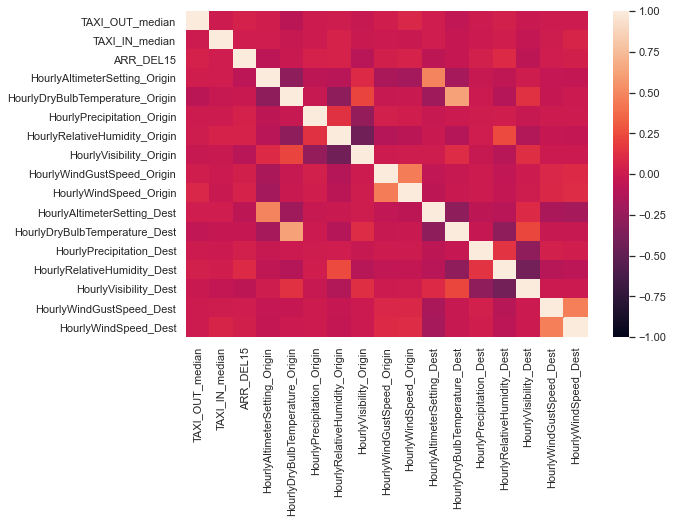

In [10]:
# Heatmap showing global correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=False, cbar=True, cmap=sns.cm.rocket);

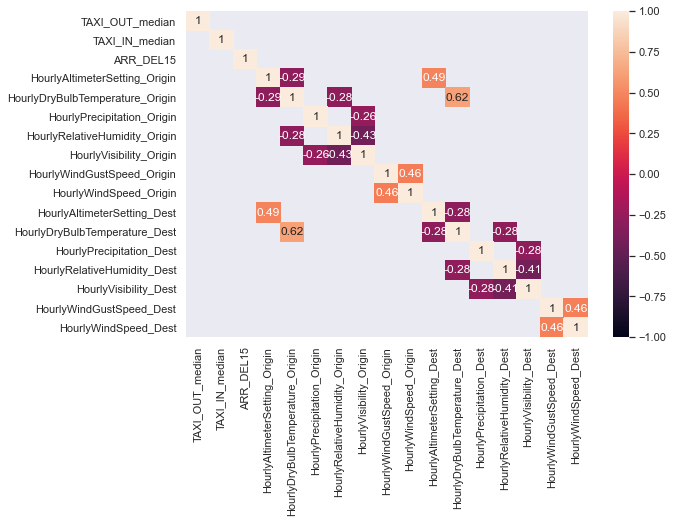

In [11]:
# Heatmap showing remarkable correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=True, cbar=True, cmap=sns.cm.rocket, mask=abs(df_all.corr()) < 0.25);

## 2. Dataset overview

In [12]:
# For deterministic purposes, let's define a seed:
np.random.seed(0)

In [13]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200053 entries, 0 to 7200052
Data columns (total 27 columns):
 #   Column                           Dtype   
---  ------                           -----   
 0   MONTH                            category
 1   DAY_OF_WEEK                      category
 2   OP_UNIQUE_CARRIER                category
 3   ORIGIN_STATE_NM                  category
 4   DEST_STATE_NM                    category
 5   DEP_TIME_hour                    category
 6   TAXI_OUT_median                  int32   
 7   TAXI_IN_median                   int32   
 8   ARR_DEL15                        int32   
 9   ARR_TIME_hour                    category
 10  DISTANCE_GROUP                   category
 11  HourlyAltimeterSetting_Origin    float64 
 12  HourlyDryBulbTemperature_Origin  float64 
 13  HourlyPrecipitation_Origin       float64 
 14  HourlyRelativeHumidity_Origin    float64 
 15  HourlySkyConditions_Origin       category
 16  HourlyVisibility_Origin          flo

In [67]:
# For the initial runs, define a reasonably-sized sample:
sample_length = int(1e5)

# # The dataset is somehow imbalanced (80% on-time / 20% delayed), so let's perform some quick undersampling:
# delayed = df_all[df_all['ARR_DEL15'] == 1].sample(sample_length // 2)
# ontime = df_all[df_all['ARR_DEL15'] == 0].sample(sample_length // 2)
# df = delayed.append(ontime)

# Although the dataset is somehow imbalanced (80% on-time / 20% delayed), let's try to keep it as is for this test:
df = df_all.sample(sample_length)

# # Get dummies for the categorical features:
# df = pd.get_dummies(df)

print("On-time flights: {:7d} ({:5.2f}%)".format(len(df[df['ARR_DEL15'] == 0]), 100*len(df[df['ARR_DEL15'] == 0])/len(df)))
print("Delayed flights: {:7d} ({:5.2f}%)".format(len(df[df['ARR_DEL15'] == 1]), 100*len(df[df['ARR_DEL15'] == 1])/len(df)))

On-time flights:   80824 (80.82%)
Delayed flights:   19176 (19.18%)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 5144704 to 325506
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   MONTH                            100000 non-null  category
 1   DAY_OF_WEEK                      100000 non-null  category
 2   OP_UNIQUE_CARRIER                100000 non-null  category
 3   ORIGIN_STATE_NM                  100000 non-null  category
 4   DEST_STATE_NM                    100000 non-null  category
 5   DEP_TIME_hour                    100000 non-null  category
 6   TAXI_OUT_median                  100000 non-null  int32   
 7   TAXI_IN_median                   100000 non-null  int32   
 8   ARR_DEL15                        100000 non-null  int32   
 9   ARR_TIME_hour                    100000 non-null  category
 10  DISTANCE_GROUP                   100000 non-null  category
 11  HourlyAltimeterSetting_Origin    100000 non-nu

In [69]:
categorical_features = train.select_dtypes('category').columns
df[categorical_features] = df[categorical_features].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 5144704 to 325506
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   MONTH                            100000 non-null  string 
 1   DAY_OF_WEEK                      100000 non-null  string 
 2   OP_UNIQUE_CARRIER                100000 non-null  string 
 3   ORIGIN_STATE_NM                  100000 non-null  string 
 4   DEST_STATE_NM                    100000 non-null  string 
 5   DEP_TIME_hour                    100000 non-null  string 
 6   TAXI_OUT_median                  100000 non-null  int32  
 7   TAXI_IN_median                   100000 non-null  int32  
 8   ARR_DEL15                        100000 non-null  int32  
 9   ARR_TIME_hour                    100000 non-null  string 
 10  DISTANCE_GROUP                   100000 non-null  string 
 11  HourlyAltimeterSetting_Origin    100000 non-null  float64
 

In [70]:
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [72]:
categorical_features = df.select_dtypes('string').columns
categorical_features

Index(['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN_STATE_NM',
       'DEST_STATE_NM', 'DEP_TIME_hour', 'ARR_TIME_hour', 'DISTANCE_GROUP',
       'HourlySkyConditions_Origin', 'HourlySkyConditions_Dest'],
      dtype='object')

In [73]:
for c in categorical_features:
    df[c] = calc_smooth_mean(df, c, 'ARR_DEL15', 300) 
df

MONTH  DAY_OF_WEEK  OP_UNIQUE_CARRIER  ORIGIN_STATE_NM  \
5144704  0.198999     0.173373           0.213510         0.173940   
6242753  0.211249     0.199158           0.239966         0.233804   
6501388  0.198999     0.173373           0.180707         0.173940   
5110969  0.183051     0.190535           0.210840         0.229850   
3292427  0.183051     0.202862           0.179139         0.154602   
...           ...          ...                ...              ...   
6742514  0.208570     0.181910           0.184410         0.173940   
3503668  0.208570     0.206095           0.179139         0.189374   
1601298  0.210285     0.199158           0.195017         0.197673   
1763463  0.208570     0.190535           0.204733         0.199306   
325506   0.143772     0.181910           0.145987         0.154804   

         DEST_STATE_NM  DEP_TIME_hour  TAXI_OUT_median  TAXI_IN_median  \
5144704       0.170797       0.155340               15               7   
6242753       0.199047       0.113386               15              10   
6501388       0.188762       0.113386               13               9   
5110969       0.199047       0.143265               16               8   
3292427       0.208239       0.184566               10               6   
...                ...            ...              ...             ...   
6742514       0.158156       0.262995               14               6   
3503668       0.197030       0.184566                9               5   
1601298       0.178708       0.103463               13               6   
1763463       0.214382       0.261718               11              13   
325506        0.147170       0.103463               14               8   

         ARR_DEL15  ARR_TIME_hour  DISTANCE_GROUP  \
5144704          1       0.137719        0.184047   
6242753          1       0.131673        0.201573   
6501388          0       0.097142        0.190585   
5110969          0       0.144663        0.205669   
3292427          0       0.204144        0.198841   
...            ...            ...             ...   
6742514          0       0.238221        0.201573   
3503668          0       0.172455        0.205669   
1601298          0       0.097142        0.175280   
1763463          1       0.251880        0.184047   
325506           0       0.120133        0.198841   

         HourlyAltimeterSetting_Origin  HourlyDryBulbTemperature_Origin  \
5144704                         29.935                             64.0   
6242753                         29.900                             37.0   
6501388                         29.920                             56.0   
5110969                         30.070                             78.0   
3292427                         29.720                             53.0   
...                                ...                              ...   
6742514                         29.760                             73.0   
3503668                         29.830                             86.0   
1601298                         30.230                             78.0   
1763463                         29.880                             73.0   
325506                          30.170                             58.0   

         HourlyPrecipitation_Origin  HourlyRelativeHumidity_Origin  \
5144704                        0.00                           65.0   
6242753                        0.00                           59.0   
6501388                        0.00                           84.0   
5110969                        0.01                           82.0   
3292427                        0.00                           61.0   
...                             ...                            ...   
6742514                        0.00                           69.0   
3503668                        0.00                           46.0   
1601298                        0.00                           64.0   
1763463                        0.00         

In [74]:
for c in categorical_features:
    print(c, ":\n", df[c].value_counts())

MONTH :
 0.208570    8980
0.210285    8852
0.169932    8642
0.168393    8599
0.211249    8583
0.198999    8567
0.250345    8466
0.143772    8238
0.146820    8197
0.183051    8094
0.183770    7702
0.226359    7080
Name: MONTH, dtype: int64
DAY_OF_WEEK :
 0.199158    14992
0.206095    14880
0.202862    14767
0.184506    14510
0.181910    14419
0.190535    14351
0.173373    12081
Name: DAY_OF_WEEK, dtype: int64
OP_UNIQUE_CARRIER :
 0.179139    18303
0.145987    14020
0.210840    12608
0.189461    10903
0.216926     8558
0.204733     4333
0.199638     4316
0.246656     4028
0.195017     3969
0.180707     3643
0.179739     3425
0.213510     3070
0.184410     2745
0.239966     1840
0.243237     1803
0.204894     1279
0.125963     1157
Name: OP_UNIQUE_CARRIER, dtype: int64
ORIGIN_STATE_NM :
 0.173940    11069
0.210633    10603
0.191171     7863
0.249925     5976
0.160138     5823
0.221175     5241
0.199421     4662
0.233804     3727
0.197673     3684
0.170928     2757
0.169212     2658
0.1784

### Train / Test / Validation split
Break the dataset into three blocks:
1. Training (70%)
2. Test (15%)
3. Validation (15%)

In [75]:
# Divide the data:
train_idx = df.sample(frac=0.7).index
# for c in df.select_dtypes('string').columns:
#     df[c] = target_encoder(df_all, column=c, target='ARR_DEL15', index=train_idx, method='mean')
train = df.loc[train_idx, :]
test_valid = df.drop(train.index)
test = test_valid.sample(frac=0.5)
valid = test_valid.drop(test.index)

print("Total dataset:      {:7d} ({:6.2f}%)".format(len(df), 100*len(df)/len(df)))
print("Training dataset:   {:7d} ( {:5.2f}%)".format(len(train), 100*len(train)/len(df)))
print("Test dataset:       {:7d} ( {:5.2f}%)".format(len(test), 100*len(test)/len(df)))
print("Validation dataset: {:7d} ( {:5.2f}%)".format(len(valid), 100*len(valid)/len(df)))

Total dataset:       100000 (100.00%)
Training dataset:     70000 ( 70.00%)
Test dataset:         15000 ( 15.00%)
Validation dataset:   15000 ( 15.00%)


### Target Encoding of categorical features

In [76]:
train.head()

MONTH  DAY_OF_WEEK  OP_UNIQUE_CARRIER  ORIGIN_STATE_NM  \
5705112  0.183051     0.184506           0.204733         0.210633   
4842676  0.208570     0.184506           0.189461         0.154804   
789886   0.183770     0.202862           0.145987         0.210633   
2906031  0.168393     0.173373           0.246656         0.171957   
2969246  0.146820     0.206095           0.179739         0.221175   

         DEST_STATE_NM  DEP_TIME_hour  TAXI_OUT_median  TAXI_IN_median  \
5705112       0.197030       0.184566               19               3   
4842676       0.165909       0.255223               17               4   
789886        0.227997       0.184566               16               8   
2906031       0.250521       0.199954               12               6   
2969246       0.227997       0.162190               24               4   

         ARR_DEL15  ARR_TIME_hour  DISTANCE_GROUP  \
5705112          0       0.167805        0.175280   
4842676          0       0.247266        0.184047   
789886           1       0.204144        0.206473   
2906031          0       0.191780        0.198841   
2969246          0       0.144663        0.175280   

         HourlyAltimeterSetting_Origin  HourlyDryBulbTemperature_Origin  \
5705112                         29.875                             78.0   
4842676                         29.970                             75.0   
789886                          29.970                             71.0   
2906031                         30.030                             81.0   
2969246                         30.120                             55.0   

         HourlyPrecipitation_Origin  HourlyRelativeHumidity_Origin  \
5705112                         0.0                           74.0   
4842676                         0.0                           76.0   
789886                          0.0                           47.0   
2906031                         0.0                           37.0   
2969246                         0.0                           67.0   

         HourlySkyConditions_Origin  HourlyVisibility_Origin  \
5705112                    0.193855                     9.94   
4842676                    0.179054                    10.00   
789886                     0.193855                     9.94   
2906031                    0.193855                     9.94   
2969246                    0.231484                    10.00   

         HourlyWindGustSpeed_Origin  HourlyWindSpeed_Origin  \
5705112                         0.0                    17.0   
4842676                         0.0                     6.0   
789886                          0.0                    13.0   
2906031                         0.0                     6.0   
2969246                         0.0                    11.0   

         HourlyAltimeterSetting_Dest  HourlyDryBulbTemperature_Dest  \
5705112                        29.87                           81.0   
4842676                        29.90                           63.0   
789886                         30.42                           31.0   
2906031                        29.94                           58.0   
2969246                        30.12                           37.0   

         HourlyPrecipitation_Dest  HourlyRelativeHumidity_Dest  \
5705112                       0.0                         67.0   
4842676                       0.0                         90.0   
789886                        0.0                         30.0   
2906031                       0.0                         75.0   
2969246                       0.0                         89.0   

         HourlySkyConditions_Dest  HourlyVisibility_Dest  \
5705112                  0.193380                  10.00   
4842676                  0.170528                  10.00   
789886                   0.194152                   9.94   
2906031                  0.233607                  10.00   
2969246                  0.233607                   8.00   

      

# XGBoost

In [77]:
from xgboost import XGBClassifier

In [78]:
# Train / Test partition:
X_train, y_train = train.drop("ARR_DEL15", axis=1), train["ARR_DEL15"]
X_test, y_test = test.drop("ARR_DEL15", axis=1), test["ARR_DEL15"]

# Validation:
X_valid, y_valid = valid.drop("ARR_DEL15", axis=1), valid["ARR_DEL15"]

`num_boost_round`: corresponds to the number of boosting rounds or trees to build
- Its optimal value highly depends on the other parameters, and thus it should be re-tuned each time you update a parameter.
- You could do this by tuning it together with all parameters in a grid-search, but it requires a lot of computational effort.
- Fortunately XGBoost provides a nice way to find the best number of rounds whilst training.
- We can test our model at each step and see if adding a new tree/round improves performance.
- If performance haven’t improved for N rounds (N is defined by the variable `early_stopping_round`), we stop the training and keep the best number of boosting rounds.

In [79]:
# Summarize class distribution:
from collections import Counter

counter = Counter(y_train)
total_negative_examples = counter[0]
total_positive_examples = counter[1]

# A sensible default value to set for the scale_pos_weight hyperparameter is the inverse of the class distribution:
scale_pos_weight = total_negative_examples / total_positive_examples

print("TRAINING DATASET")
print("Total dataset:      {:7d} ({:6.2f}%)".format(len(train), 100*len(train)/len(train)))
print("On-time:            {:7d} ( {:5.2f}%)".format(total_negative_examples, 100*total_negative_examples/len(train)))
print("Delayed:            {:7d} ( {:5.2f}%)".format(total_positive_examples, 100*total_positive_examples/len(train)))
print("'scale_pos_weight' value: {:5.2f}".format(scale_pos_weight))

TRAINING DATASET
Total dataset:        70000 (100.00%)
On-time:              56671 ( 80.96%)
Delayed:              13329 ( 19.04%)
'scale_pos_weight' value:  4.25


In [80]:
# Basic model definition:
xgb_model = XGBClassifier(use_label_encoder=False, verbosity=1, random_state=0, objective= 'binary:logistic',
                          booster='gbtree', tree_method='auto', num_boost_round = 999, early_stopping_round=10,
                          scale_pos_weight=scale_pos_weight)

params = {
            'min_child_weight': [0.1, 1, 5, 10, 50],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [5, 10, 25, 50],
            'learning_rate': [0.0001, 0.001, 0.1, 1],
            'n_estimators': [50, 100, 250, 500],
            'reg_alpha': [0.0001, 0.001, 0.1, 1],
            'reg_lambda': [0.0001, 0.001, 0.1, 1]
        }

## Training

Info: https://stackoverflow.com/questions/51587535/custom-evaluation-function-based-on-f1-for-use-in-xgboost-python-api

In [81]:
# Source: https://github.com/dask/dask-searchcv/issues/51
# Info: https://ml.dask.org/modules/generated/dask_ml.model_selection.RandomizedSearchCV.html

from dask_ml.model_selection import RandomizedSearchCV
from dask.diagnostics import ProgressBar

dask_rscv = RandomizedSearchCV(xgb_model, 
                               cv=5,
                               param_distributions=params, 
                               n_iter=50, # Number of parameter settings that are sampled → trades off runtime vs quality
                               scoring='average_precision', # AP summarizes a precision-recall curve
                               n_jobs=-2, # all CPUs but one are used
                               random_state=0)

with ProgressBar():
    dask_rscv.fit(X=X_train, y=y_train)

[########################################] | 100% Completed |  1hr 51min 52.9s
[########################################] | 100% Completed |  1min 19.2s


In [82]:
cv_res = pd.DataFrame(dask_rscv.cv_results_)
cv_res

params  mean_fit_time  \
0   {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alp...      28.241029   
1   {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alp...     104.039911   
2   {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha...      28.048301   
3   {'subsample': 0.8, 'reg_lambda': 0.001, 'reg_a...      51.794914   
4   {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha...      32.923374   
5   {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha...      65.142937   
6   {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha...     116.407997   
7   {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alp...      88.120574   
8   {'subsample': 1.0, 'reg_lambda': 0.001, 'reg_a...     177.865430   
9   {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha...      51.381104   
10  {'subsample': 0.8, 'reg_lambda': 0.0001, 'reg_...      21.117903   
11  {'subsample': 1.0, 'reg_lambda': 0.0001, 'reg_...      27.490085   
12  {'subsample': 0.8, 'reg_lambda': 0.001, 'reg_a...      69.709714   
13  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alp...      61.068123   
14  {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha...      14.114235   
15  {'subsample': 0.6, 'reg_lambda': 0.0001, 'reg_...      24.144018   
16  {'subsample': 0.8, 'reg_lambda': 0.001, 'reg_a...      34.538902   
17  {'subsample': 0.6, 'reg_lambda': 0.0001, 'reg_...      14.264273   
18  {'subsample': 1.0, 'reg_lambda': 0.0001, 'reg_...     219.476196   
19  {'subsample': 0.8, 'reg_lambda': 0.0001, 'reg_...       9.948426   
20  {'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alp...     241.471464   
21  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alp...      23.057711   
22  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alp...     149.223395   
23  {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alp...     166.733648   
24  {'subsample': 1.0, 'reg_lambda': 0.001, 'reg_a...      17.067952   
25  {'subsample': 1.0, 'reg_lambda': 0.001, 'reg_a...      26.641455   
26  {'subsample': 0.8, 'reg_lambda': 0.0001, 'reg_...      16.412045   
27  {'subsample': 1.0, 'reg_lambda': 0.001, 'reg_a...     144.516329   
28  {'subsample': 0.8, 'reg_lambda': 0.001, 'reg_a...      69.062745   
29  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alp...     165.454724   
30  {'subsample': 0.6, 'reg_lambda': 0.0001, 'reg_...     113.030697   
31  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alp...     122.778826   
32  {'subsample': 1.0, 'reg_lambda': 0.001, 'reg_a...      11.054199   
33  {'subsample': 1.0, 'reg_lambda': 0.0001, 'reg_...     109.085005   
34  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alp...      82.652097   
35  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alp...      64.755411   
36  {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alp...     478.865381   
37  {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha...      81.085468   
38  {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha...      61.360732   
39  {'subsample': 0.6, 'reg_lambda': 0.0001, 'reg_...      15.970867   
40  {'subsample': 0.8, 'reg_lambda': 0.0001, 'reg_...      25.763580   
41  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alp...     163.079761   
42  {'subsample': 0.8, 'reg_lambda': 0.0001, 'reg_...     159.189155   
43  {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha...      41.049221   
44  {'subsample': 0.6, 'reg_lambda': 0.001, 'reg_a...      76.413736   
45  {'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alp...      17.620115   
46  {'subsample': 0.6, 'reg_lambda': 0.001, 'reg_a...      21.578502   
47  {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alp...      57.453926   
48  {'subsample': 0.8, 'reg_lambda': 0.0001, 'reg_...      13.838967   
49  {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha...      35.185256   

    std_fit_time  mean_score_time  std_score_time  split0_test_score  \
0       0.443319         0.069954        0.015187           0.281825   
1      12.529076         0.119019        0.019061           0.267747   
2       4.916339         0.077742        0.010429           0.330854   
3       5.084418         0.130295        0.038565           0.359252   
4       2.1399

In [83]:
dask_rscv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, early_stopping_round=10,
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=25, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=4,
              num_boost_round=999, num_parallel_tree=1, random_state=0,
              reg_alpha=0.001, reg_lambda=0.1,
              scale_pos_weight=4.251706804711532, subsample=0.8,
              tree_method='auto', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

In [84]:
dask_rscv.best_score_

0.3777814229632761

In [85]:
dask_rscv.best_params_

{'subsample': 0.8,
 'reg_lambda': 0.1,
 'reg_alpha': 0.001,
 'n_estimators': 250,
 'min_child_weight': 5,
 'max_depth': 25,
 'learning_rate': 0.001,
 'gamma': 5,
 'colsample_bytree': 0.6}

In [86]:
dask_rscv.best_index_

29

In [87]:
dask_rscv.scorer_

make_scorer(average_precision_score, needs_threshold=True)

In [88]:
dask_rscv.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_round=10, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constr...
                   n_iter=50, n_jobs=-2,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                     

In [89]:
dask_rscv.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [90]:
dask_rscv.predict_proba(X_test)

array([[0.52249277, 0.47750726],
       [0.5537977 , 0.4462023 ],
       [0.56993186, 0.43006817],
       ...,
       [0.5438223 , 0.45617774],
       [0.47706103, 0.52293897],
       [0.5398994 , 0.4601006 ]], dtype=float32)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.500252 to fit


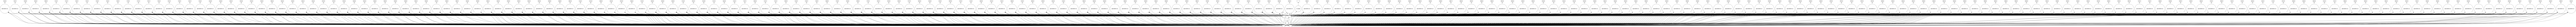

In [91]:
dask_rscv.visualize(filename='dask_rscv_26', format='png')

In [92]:
best_dask_rscv = dask_rscv.best_estimator_
best_dask_rscv

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, early_stopping_round=10,
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=25, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=4,
              num_boost_round=999, num_parallel_tree=1, random_state=0,
              reg_alpha=0.001, reg_lambda=0.1,
              scale_pos_weight=4.251706804711532, subsample=0.8,
              tree_method='auto', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

## Evaluation

### Additional metrics results

In [93]:
# Evaluate the model's metrics:

from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, accuracy_score, \
                            confusion_matrix, classification_report, roc_curve, precision_recall_curve, \
                            roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve

def clf_metrics(classifier, y_test, y_pred):
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Normalized confusion matrix:\n", confusion_matrix(y_test, y_pred, normalize='true'), '\n')
    print(classification_report(y_test, y_pred, target_names=['on-time', 'delayed']))
    print("F-beta (ß=2) = {:6.3f}".format(fbeta_score(y_test, y_pred, beta=2)))   
    print("F1 =           {:6.3f}".format(f1_score(y_test, y_pred)))   
    print("Recall =       {:6.3f}".format(recall_score(y_test, y_pred)))   
    print("Precision =    {:6.3f}".format(precision_score(y_test, y_pred)))   
    print("Accuracy =     {:6.3f}".format(accuracy_score(y_test, y_pred)))

### Test

In [94]:
y_train_pred = best_dask_rscv.predict(X_train)
y_test_pred = best_dask_rscv.predict(X_test)
y_valid_pred = best_dask_rscv.predict(X_valid)
y_test_pred

array([0, 0, 0, ..., 0, 1, 0])

In [95]:
print("-+-+-+ TRAINING dataset +-+-+-\n")
clf_metrics(best_dask_rscv, y_train, y_train_pred)
print("-------------------------------------------------------\n")
print("-+-+-+ TEST dataset: +-+-+-\n")
clf_metrics(best_dask_rscv, y_test, y_test_pred)
print("-------------------------------------------------------\n")
print("-+-+-+ VALIDATION dataset: +-+-+-\n")
clf_metrics(best_dask_rscv, y_valid, y_valid_pred)

-+-+-+ TRAINING dataset +-+-+-

Confusion matrix:
 [[54229  2442]
 [  318 13011]]
Normalized confusion matrix:
 [[0.95690918 0.04309082]
 [0.02385775 0.97614225]] 

              precision    recall  f1-score   support

     on-time       0.99      0.96      0.98     56671
     delayed       0.84      0.98      0.90     13329

    accuracy                           0.96     70000
   macro avg       0.92      0.97      0.94     70000
weighted avg       0.97      0.96      0.96     70000

F-beta (ß=2) =  0.946
F1 =            0.904
Recall =        0.976
Precision =     0.842
Accuracy =      0.961
-------------------------------------------------------

-+-+-+ TEST dataset: +-+-+-

Confusion matrix:
 [[10721  1378]
 [ 1899  1002]]
Normalized confusion matrix:
 [[0.88610629 0.11389371]
 [0.65460186 0.34539814]] 

              precision    recall  f1-score   support

     on-time       0.85      0.89      0.87     12099
     delayed       0.42      0.35      0.38      2901

    accuracy   

### ROC curve

In [96]:
y_train_probabilities = best_dask_rscv.predict_proba(X_train)[:,1]
y_test_probabilities = best_dask_rscv.predict_proba(X_test)[:,1]
y_valid_probabilities = best_dask_rscv.predict_proba(X_valid)[:,1]
y_test_probabilities[:10]

array([0.47750726, 0.4462023 , 0.43006817, 0.49813846, 0.5220214 ,
       0.5122202 , 0.46336398, 0.43760803, 0.4635508 , 0.49351034],
      dtype=float32)

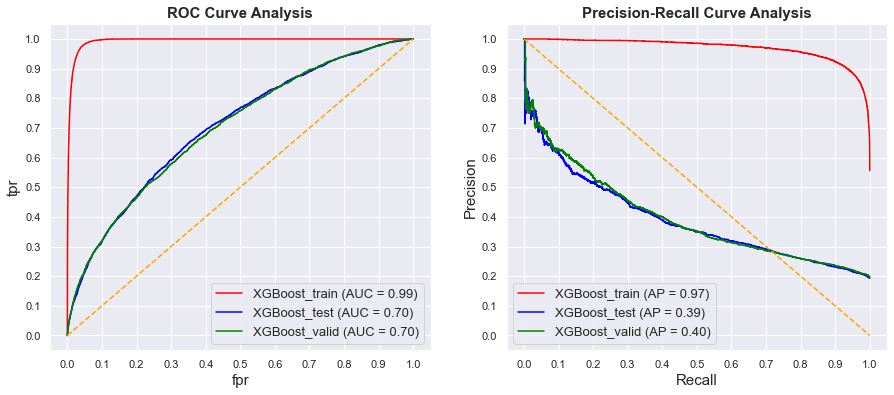

In [98]:
# Plot the figure:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
       
plot_roc_curve(best_dask_rscv, X_train, y_train, color='red', name='XGBoost_train', ax=ax[0])
plot_roc_curve(best_dask_rscv, X_test, y_test, color='blue', name='XGBoost_test', ax=ax[0])
plot_roc_curve(best_dask_rscv, X_valid, y_valid, color='green', name='XGBoost_valid', ax=ax[0])
ax[0].plot([0,1], [0,1], color='orange', linestyle='--')

ax[0].set_xticks(np.arange(0.0, 1.1, step=0.1))
ax[0].set_xlabel("fpr", fontsize=15)

ax[0].set_yticks(np.arange(0.0, 1.1, step=0.1))
ax[0].set_ylabel("tpr", fontsize=15)

ax[0].set_title('ROC Curve Analysis', fontweight='bold', fontsize=15)
ax[0].legend(prop={'size':13}, loc='lower right')


plot_precision_recall_curve(best_dask_rscv, X_train, y_train, color='red', name='XGBoost_train', ax=ax[1])
plot_precision_recall_curve(best_dask_rscv, X_test, y_test, color='blue', name='XGBoost_test', ax=ax[1])
plot_precision_recall_curve(best_dask_rscv, X_valid, y_valid, color='green', name='XGBoost_valid', ax=ax[1])
ax[1].plot([0,1], [1,0], color='orange', linestyle='--')

ax[1].set_xticks(np.arange(0.0, 1.1, step=0.1))
ax[1].set_xlabel("Recall", fontsize=15)

ax[1].set_yticks(np.arange(0.0, 1.1, step=0.1))
ax[1].set_ylabel("Precision", fontsize=15)

ax[1].set_title('Precision-Recall Curve Analysis', fontweight='bold', fontsize=15)
ax[1].legend(prop={'size':13}, loc='lower left')

## Plotting

### Feature importance (data)

In [99]:
# Let's build a dictionary to better see each INFORMATIVE feature with its corresponding importance:
feature_importance_dict = dict(zip(X_train.columns, best_dask_rscv.feature_importances_))
feature_importance_df = pd.DataFrame(feature_importance_dict.items(), columns=['Feature', 'Importance']) \
                          .sort_values(by='Importance', ascending=False)
feature_importance_df = feature_importance_df[feature_importance_df['Importance'] != 0]
feature_importance_df

Feature  Importance
8                     ARR_TIME_hour    0.077506
15          HourlyVisibility_Origin    0.054117
12       HourlyPrecipitation_Origin    0.053713
5                     DEP_TIME_hour    0.052665
20         HourlyPrecipitation_Dest    0.046948
0                             MONTH    0.040806
2                 OP_UNIQUE_CARRIER    0.039481
13    HourlyRelativeHumidity_Origin    0.039159
3                   ORIGIN_STATE_NM    0.038451
21      HourlyRelativeHumidity_Dest    0.037440
4                     DEST_STATE_NM    0.036473
24         HourlyWindGustSpeed_Dest    0.035634
16       HourlyWindGustSpeed_Origin    0.034264
23            HourlyVisibility_Dest    0.033775
11  HourlyDryBulbTemperature_Origin    0.033478
10    HourlyAltimeterSetting_Origin    0.032656
6                   TAXI_OUT_median    0.032484
18      HourlyAltimeterSetting_Dest    0.032026
19    HourlyDryBulbTemperature_Dest    0.031990
14       HourlySkyConditions_Origin    0.031590
25             HourlyWindSpeed_Dest    0.031563
17           HourlyWindSpeed_Origin    0.031485
22         HourlySkyConditions_Dest    0.031103
1                       DAY_OF_WEEK    0.030737
7                    TAXI_IN_median    0.030645
9                    DISTANCE_GROUP    0.029813

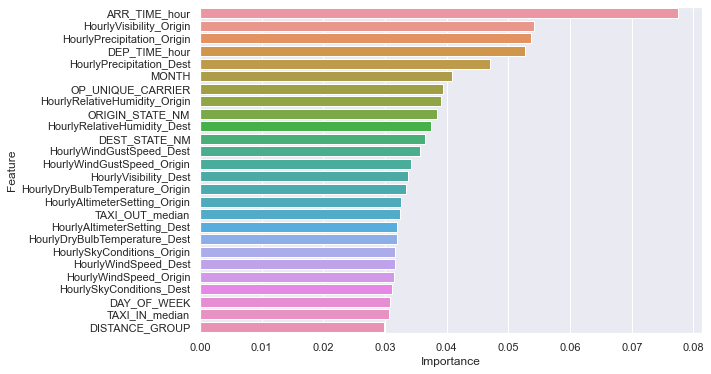

In [102]:
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.barplot(y='Feature', x='Importance', data=feature_importance_df, orient='h');

### Permutation Feature Importance

In [103]:
# Source: https://machinelearningmastery.com/calculate-feature-importance-with-python/

from sklearn.inspection import permutation_importance

# perform permutation importance
results = permutation_importance(best_dask_rscv, X_train, y_train, scoring='average_precision')
# get importance
importance = dict(zip(X_train.columns, results.importances_mean))
permutation_importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Permutation_Importance']) \
                          .sort_values(by='Permutation_Importance', ascending=False)
permutation_importance_df = permutation_importance_df[permutation_importance_df['Permutation_Importance'] != 0]
permutation_importance_df

Feature  Permutation_Importance
8                     ARR_TIME_hour                0.155799
13    HourlyRelativeHumidity_Origin                0.120692
0                             MONTH                0.113408
21      HourlyRelativeHumidity_Dest                0.110932
4                     DEST_STATE_NM                0.098075
3                   ORIGIN_STATE_NM                0.094621
10    HourlyAltimeterSetting_Origin                0.080252
2                 OP_UNIQUE_CARRIER                0.079922
11  HourlyDryBulbTemperature_Origin                0.073594
5                     DEP_TIME_hour                0.062071
19    HourlyDryBulbTemperature_Dest                0.057583
18      HourlyAltimeterSetting_Dest                0.052051
6                   TAXI_OUT_median                0.042722
1                       DAY_OF_WEEK                0.040861
25             HourlyWindSpeed_Dest                0.040688
17           HourlyWindSpeed_Origin                0.034134
7                    TAXI_IN_median                0.029417
22         HourlySkyConditions_Dest                0.026914
9                    DISTANCE_GROUP                0.022115
14       HourlySkyConditions_Origin                0.021425
15          HourlyVisibility_Origin                0.017360
23            HourlyVisibility_Dest                0.009394
24         HourlyWindGustSpeed_Dest                0.003643
16       HourlyWindGustSpeed_Origin                0.003643
20         HourlyPrecipitation_Dest                0.001072
12       HourlyPrecipitation_Origin                0.000456

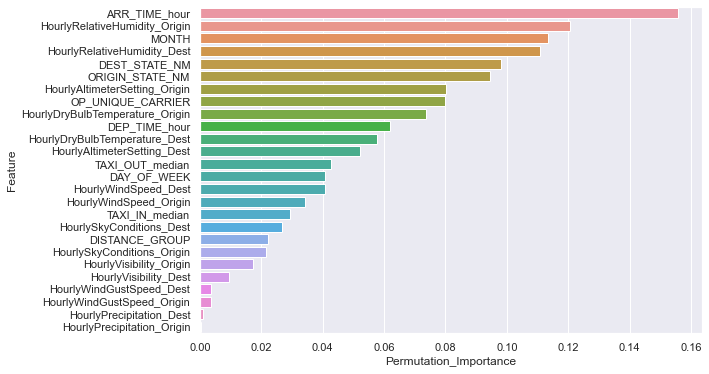

In [105]:
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.barplot(y='Feature', x='Permutation_Importance', data=permutation_importance_df, orient='h');

### Feature importance (plot)

#### Weight-based

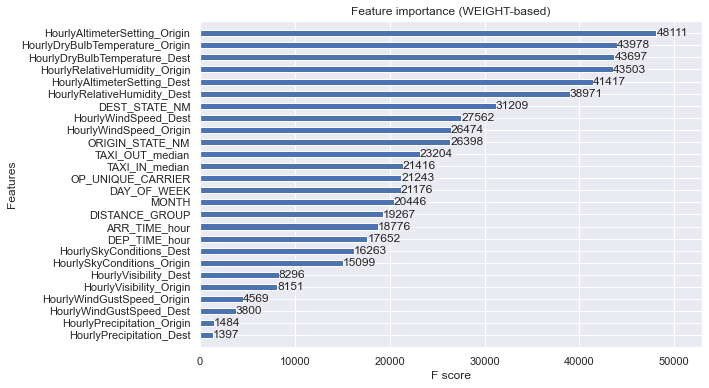

In [106]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(9,6))

plot_importance(booster=best_dask_rscv,
                ax=ax,
                grid=True,
                importance_type='weight', # ”weight” is the number of times a feature appears in a tree
                max_num_features=None, 
                height=0.5,
                xlim=None,
                ylim=None, 
                title='Feature importance (WEIGHT-based)',
                xlabel='F score',
                ylabel='Features',
                show_values=True);

#### Gain-based

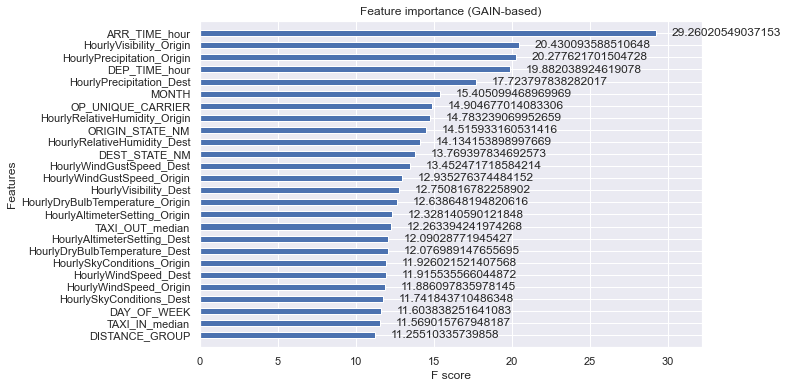

In [107]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(9,6))

plot_importance(booster=best_dask_rscv,
                ax=ax,
                grid=True,
                importance_type='gain',
                max_num_features=None, 
                height=0.5,
                xlim=None,
                ylim=None, 
                title='Feature importance (GAIN-based)',
                xlabel='F score',
                ylabel='Features',
                show_values=True);

### Tree

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.156703 to fit


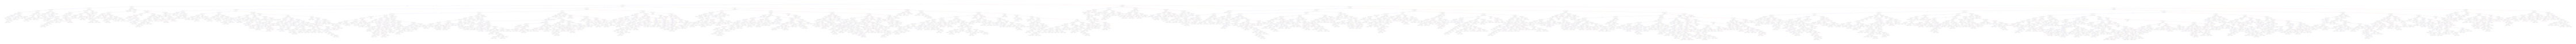

In [108]:
from xgboost import plot_tree

fig,ax = plt.subplots(figsize=(80,50))

plot_tree(booster=best_dask_rscv,
          num_trees=0,
          ax=ax)

plt.savefig('plot_tree_26_best_dask_rscv.png')

### Graphviz (tree)

*Convert specified tree to graphviz instance. IPython can automatically plot the returned graphiz instance. Otherwise, you should call `.render()` method of the returned graphiz instance.*

In [109]:
from xgboost import to_graphviz

tree_graphviz = to_graphviz(booster=best_dask_rscv,
                            yes_color='#0000FF',
                            no_color='#FF0000',
                            condition_node_params={'shape': 'box',
                                                   'style': 'filled,rounded',
                                                   'fillcolor': '#78bceb'},
                            leaf_node_params={'shape': 'box',
                                              'style': 'filled',
                                              'fillcolor': '#e48038'})

format = 'png'
tree_graphviz = to_graphviz(best_dask_rscv)
tree_graphviz.graph_attr = {'dpi':'400'}
tree_graphviz.render('tree_graphviz_26_best_dask_rscv', format = format)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.156703 to fit


'tree_graphviz_26_best_dask_rscv.png'

___

In [110]:
t1 = time.perf_counter() - t0
print("Time elapsed: {:2.0f}h {:2.0f}min {:2.0f}s".format(t1//3600, (t1%3600)//60, (t1%3600)%60))

Time elapsed:  4h 46min 33s


## Save the model

In [111]:
from joblib import dump, load

# Save model to file:
dump(best_dask_rscv, "XGBoost_26_best_dask_rscv.joblib.dat")
print("Saved model to: XGBoost_26_best_dask_rscv.joblib.dat")

Saved model to: XGBoost_26_best_dask_rscv.joblib.dat


In [112]:
# Load model from file:
loaded_model = load("XGBoost_26_best_dask_rscv.joblib.dat")
print("Loaded model from: XGBoost_26_best_dask_rscv.joblib.dat")

Loaded model from: XGBoost_26_best_dask_rscv.joblib.dat


In [113]:
# Make predictions for test data
predictions = loaded_model.predict(X_test)

# Evaluate predictions:
recall = recall_score(y_test, predictions)
print("Loaded model recall: {:6.3f}".format(recall))

Loaded model recall:  0.345


___

___